In [1]:
# import libraries:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import numpy as np

In [2]:
# loading the data:
df =pd.read_csv('imports-85.data', header=None)
pd.set_option('display.max_columns', None) # to display all columns
df.columns = range(df.shape[1]) # reset columns index
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    int64  
 1   1       205 non-null    object 
 2   2       205 non-null    object 
 3   3       205 non-null    object 
 4   4       205 non-null    object 
 5   5       205 non-null    object 
 6   6       205 non-null    object 
 7   7       205 non-null    object 
 8   8       205 non-null    object 
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    int64  
 14  14      205 non-null    object 
 15  15      205 non-null    object 
 16  16      205 non-null    int64  
 17  17      205 non-null    object 
 18  18      205 non-null    object 
 19  19      205 non-null    object 
 20  20      205 non-null    float64
 21  21      205 non-null    object 
 22  22

In [4]:
# setting the column names:
df['Price'] = df[25]
df['HorsePower'] = df[21]

In [5]:
# replacing the missing ? with 0:
df['Price'] = df['Price'].replace('?', 0)
df['HorsePower'] = df['HorsePower'].replace('?', 0)

In [6]:
# converting the columns to numeric:
df['Price'] = pd.to_numeric(df['Price'])
df['HorsePower'] = pd.to_numeric(df['HorsePower'])

In [7]:
# only keeping the columns we are interested in:
x = df[['Price', 'HorsePower']]
x

,Price,HorsePower
0,13495,111
1,16500,111
2,16500,154
3,13950,102
4,17450,115
...,...,...
200,16845,114
201,19045,160
202,21485,134
203,22470,106


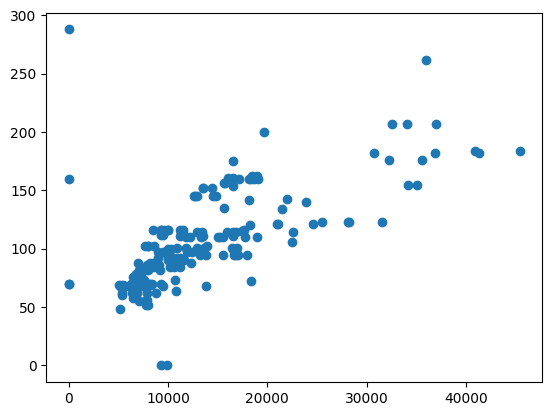

In [8]:
# plotting Price vs HorsePower:
plt.scatter(x.Price, x.HorsePower)

In [9]:
# building the first model without scaling:
model = KMeans(n_clusters=4)
model.fit_transform(x)

array([[5.59315541e+03, 9.90401969e+03, 2.00465052e+03, 2.24721914e+04],
       [8.59812753e+03, 6.89902827e+03, 1.00045117e+03, 1.94672099e+04],
       [8.59838445e+03, 6.89903918e+03, 1.00087444e+03, 1.94670952e+04],
       [6.04811165e+03, 9.44904374e+03, 1.54975425e+03, 2.20172257e+04],
       [9.54813572e+03, 5.94902085e+03, 1.95039834e+03, 1.85172016e+04],
       [7.34813236e+03, 8.14902642e+03, 2.49936998e+02, 2.07172051e+04],
       [9.80811813e+03, 5.68903784e+03, 2.21041953e+03, 1.82572231e+04],
       [1.10181135e+04, 4.47904806e+03, 3.42040673e+03, 1.70472339e+04],
       [1.59731841e+04, 4.76089868e+02, 8.37540130e+03, 1.20921530e+04],
       [7.90231800e+03, 2.33990183e+04, 1.54996617e+04, 3.59670797e+04],
       [8.52809879e+03, 6.96906350e+03, 9.30635197e+02, 1.95372496e+04],
       [9.02309752e+03, 6.47406835e+03, 1.42554774e+03, 1.90422542e+04],
       [1.30681365e+04, 2.42901957e+03, 5.47038358e+03, 1.49972056e+04],
       [1.32031358e+04, 2.29402072e+03, 5.60538358e

In [10]:
# getting the labels:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 1, 1, 1, 3, 3, 3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 3, 3, 3, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1], dtype=int32)

In [11]:
# turining the labels into a series instead of an array: 
pd.Series(model.labels_).value_counts()

0    119
2     60
3     14
1     12
dtype: int64

In [12]:
# Finding the cluster centers:
model.cluster_centers_

array([[ 7901.92436975,    81.12605042],
       [23399.        ,   130.75      ],
       [15499.61666667,   122.65      ],
       [35967.07142857,   184.42857143]])

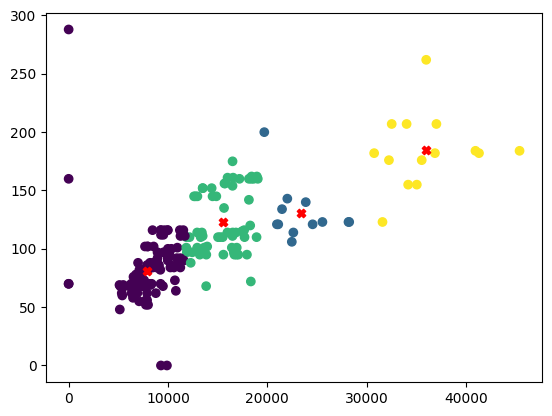

In [13]:
# plotting the clusters:
plt.scatter(x.Price, x.HorsePower, c = model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker="X", c='r')

In [14]:
# scaling the data:
scaler = MinMaxScaler()
x_scaled= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled

,Price,HorsePower
0,0.297247,0.385417
1,0.363436,0.385417
2,0.363436,0.534722
3,0.307269,0.354167
4,0.384361,0.399306
...,...,...
200,0.371035,0.395833
201,0.419493,0.555556
202,0.473238,0.465278
203,0.494934,0.368056


In [15]:
# building the first model with scaling:
model_v2 = KMeans(n_clusters=6)
model_v2.fit_transform(x_scaled)
model_v2.labels_

array([0, 3, 5, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 1, 1, 2, 4, 4, 4,
       4, 0, 4, 4, 4, 0, 0, 5, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4,
       2, 2, 0, 1, 1, 1, 4, 4, 4, 4, 4, 0, 0, 0, 5, 4, 4, 0, 0, 4, 0, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 5, 4, 4, 4, 0, 0, 4, 5, 5, 5, 4, 4, 0,
       0, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 5, 5, 5, 5, 5, 5, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 3, 5, 4, 0, 4, 4, 4, 0, 5, 3, 1, 1, 1, 5, 2, 2,
       0, 0, 3, 3, 5, 5, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 4, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0,
       0, 0, 5, 5, 5, 5, 2, 4, 2, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       5, 5, 3, 5, 3, 3, 3], dtype=int32)

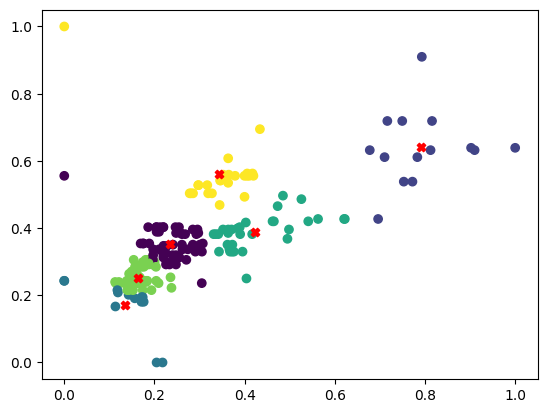

In [17]:
# Plotting the clusters:
plt.scatter(x_scaled.Price, x_scaled.HorsePower, c = model_v2.labels_)
plt.scatter(model_v2.cluster_centers_[:,0], model_v2.cluster_centers_[:,1], marker="X", c='r')

In [18]:
model.inertia_

1165734827.8690476

In [19]:
sse = [] # elbow method
s_score = [] # 
c_score = [] #

for k in range(2,11):
    km = KMeans(n_clusters=k, n_init=20) # the # of times that k-means alg w diff centroid seeds
    km.fit(x_scaled) # use x here in order to determine the number of clusters to do
    sse.append(km.inertia_)
    score = silhouette_score(x_scaled, km.labels_)
    s_score.append(score)
    cscore = calinski_harabasz_score(x_scaled, km.labels_)
    c_score.append(cscore)

In [20]:
sse

[4.6788389623970685,
 2.5908462150872036,
 1.965285078494301,
 1.5272524151532272,
 1.2037386545590334,
 0.9542283260074311,
 0.8601555066276987,
 0.7448779877419086,
 0.6574537039551958]

In [21]:
s_score

[0.5726024373972586,
 0.5282188697713515,
 0.4551914510722341,
 0.4713702199470921,
 0.4787588305509875,
 0.4793103852044277,
 0.44588990770923453,
 0.4681051728553173,
 0.4701809895568134]

In [22]:
c_score

[255.19845495179567,
 310.6948352208725,
 293.03516946924,
 295.7441686757098,
 309.3777365872938,
 332.2223241342627,
 317.3880437086849,
 322.857455058613,
 326.368080873235]

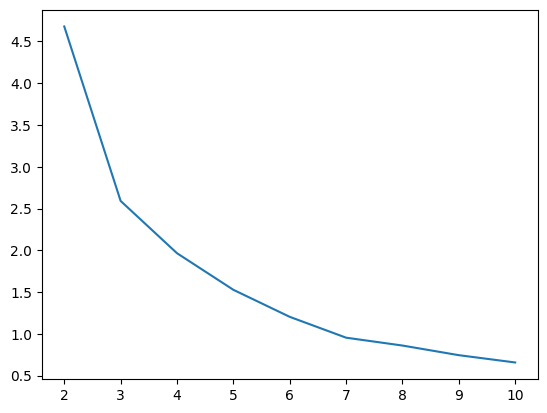

In [23]:
# plotting the sse:
plt.plot(range(2,11), sse)

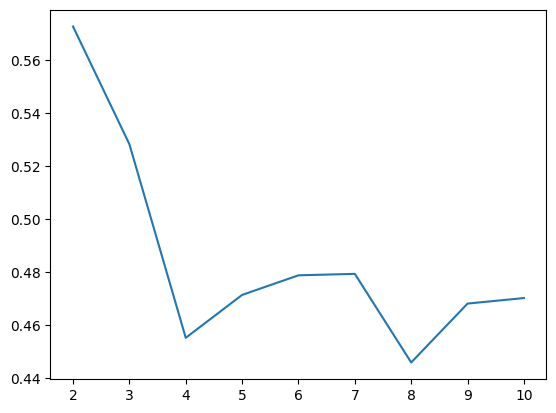

In [24]:
# plotting the silhouette score:
plt.plot(range(2,11), s_score)

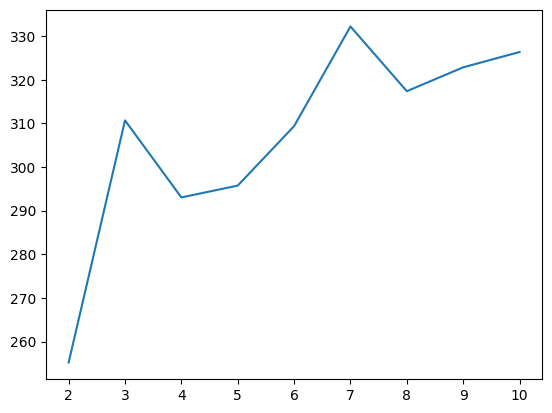

In [25]:
# plotting the calinski harabasz score:
plt.plot(range(2,11), c_score)

In [26]:
# changing the number of clusters to 4:
km = KMeans(n_clusters=4, n_init=20)
km.fit(x_scaled)

KMeans(n_clusters=4, n_init=20)

In [27]:
km.labels_

array([1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 0, 0, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3,
       3, 3, 1, 0, 0, 0, 3, 3, 3, 3, 3, 1, 1, 1, 2, 3, 3, 1, 1, 3, 1, 2,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 3, 3, 3, 1, 1, 3, 2, 2, 2, 3, 3, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 3, 3, 3, 2, 2, 0, 0, 0, 2, 3, 3,
       1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1,
       1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [28]:
x_scaled.head(2)

,Price,HorsePower
0,0.297247,0.385417
1,0.363436,0.385417


In [29]:
# predicting the cluster of a new point:
km.predict([[0.225138, 0.0]])

/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3], dtype=int32)

In [30]:
# adding the cluster to the data:
df['Clusters'] = km.labels_
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Price,HorsePower,Clusters
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,13495,111,1
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,16500,111,1
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,16500,154,2
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,13950,102,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,17450,115,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,16845,114,2
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,19045,160,2
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,21485,134,2
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470,22470,106,2


In [31]:
# aggreagting the data with min, max, and standard deviation:
df.groupby('Clusters')[['Price', 'HorsePower']].agg({min,max, np.std})

Price                     HorsePower                
            min    max          std        min  max        std
Clusters                                                      
0         30760  45400  4153.237745        123  262  31.878892
1             0  18344  3185.660917         68  160  13.207189
2             0  28248  4808.899102        106  288  30.745527
3             0  10795  1675.373024          0   88  14.277990